In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import os
def plot_met_curves(f1_met, loss_met, lang):
    '''
    plots f1 and loss curves
    '''
    train_val_f1_df = pd.DataFrame.from_dict(f1_met).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    train_val_loss_df = pd.DataFrame.from_dict(loss_met).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

    sns.lineplot(data=train_val_f1_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title(f'{lang} Train-Val F1/Epoch')
    sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title(f'{lang} Train-Val Loss/Epoch')
    
    plt.savefig(f'/home/preethamthava/LegalEval2022/rhetorical_roles/eda/train_vs_val_curves/{lang}_metrics.png')
    plt.show()

['legal-bert', 'tfidf_lr', 'scibert_lstm', 'eda', 'lsg_bart_large', 'tfidf_lstm', 'ensemble', 'scibert_tok_lstm', 'han', 'bert-lstm', 'funnel_small', 'bigbird', 'bert-base-uncased', 'distilbert', 'deberta_tok_seq', 'longformer']
/home/preethamthava/LegalEval2022/rhetorical_roles//legal-bert/results
/home/preethamthava/LegalEval2022/rhetorical_roles//scibert_lstm/results


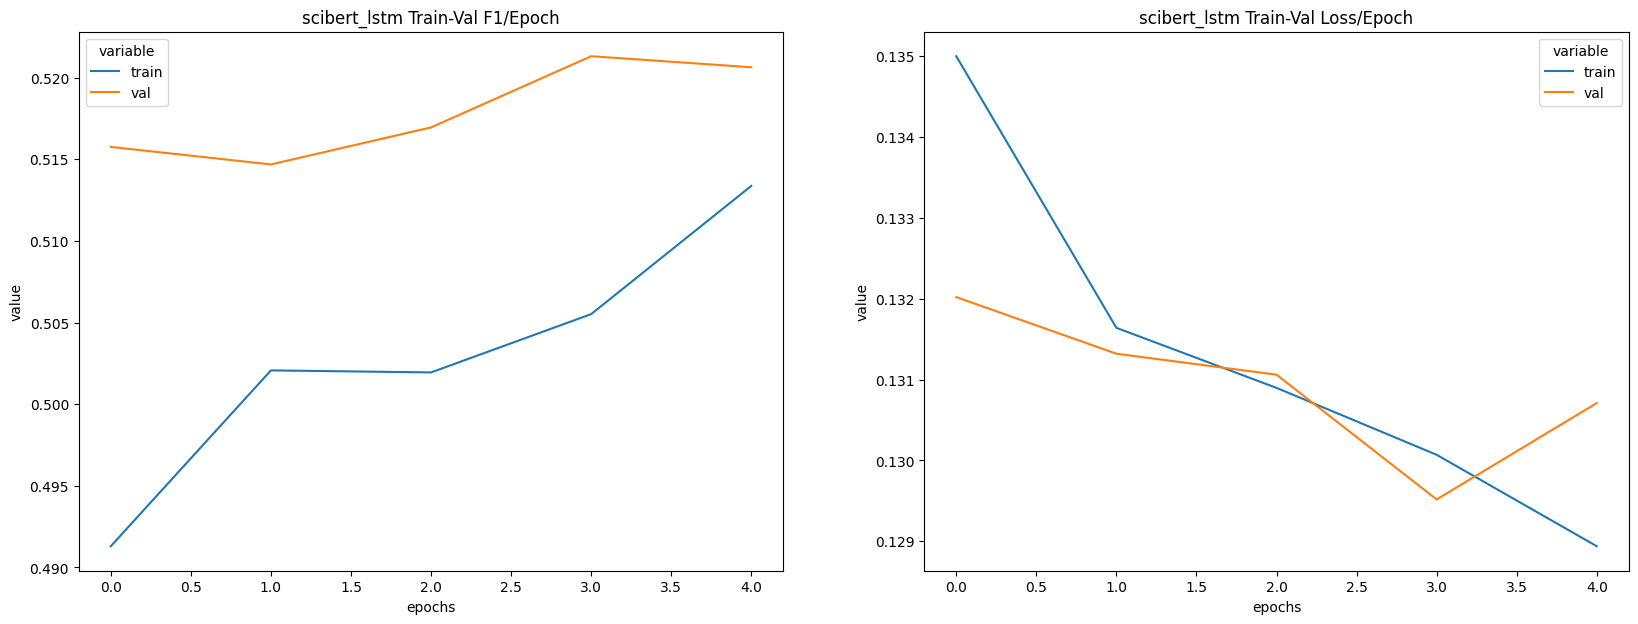

/home/preethamthava/LegalEval2022/rhetorical_roles//lsg_bart_large/results
/home/preethamthava/LegalEval2022/rhetorical_roles//tfidf_lstm/results
/home/preethamthava/LegalEval2022/rhetorical_roles//ensemble/results
/home/preethamthava/LegalEval2022/rhetorical_roles//scibert_tok_lstm/results
/home/preethamthava/LegalEval2022/rhetorical_roles//bert-lstm/results


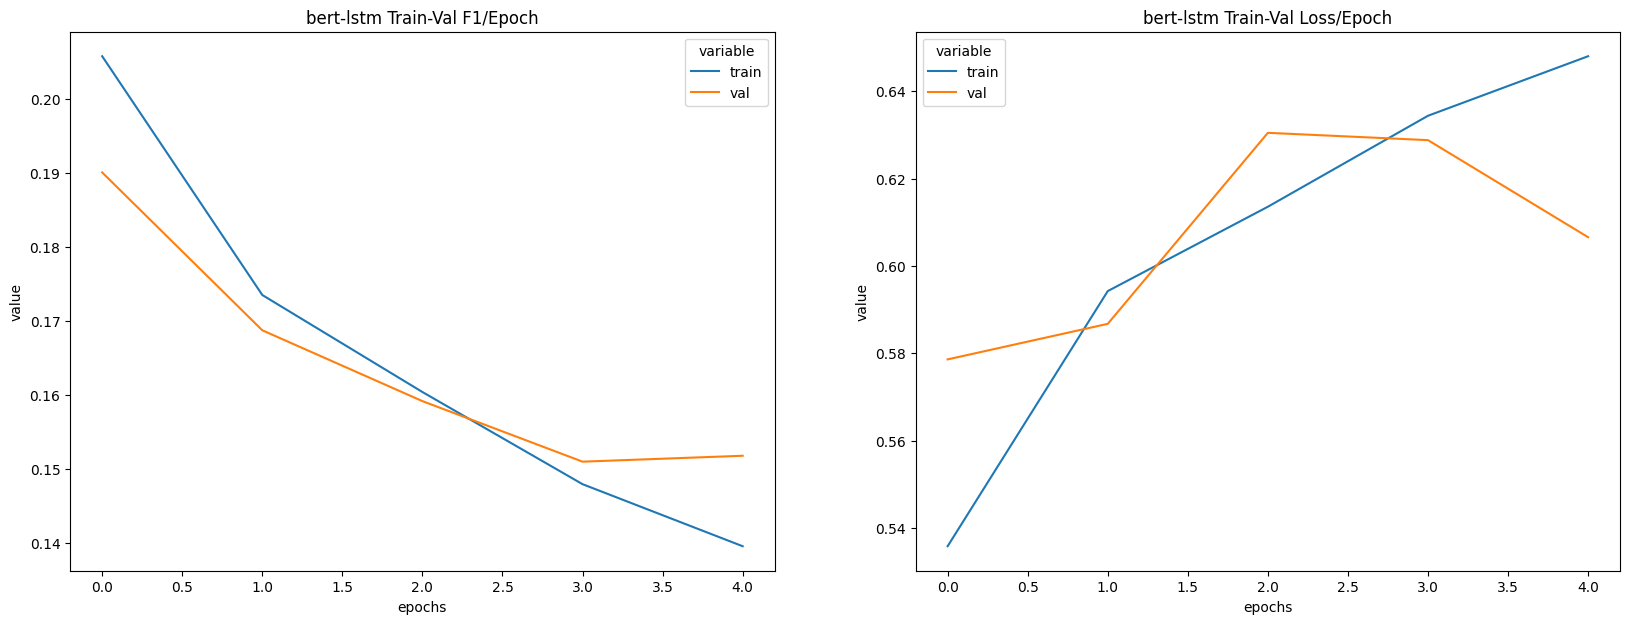

/home/preethamthava/LegalEval2022/rhetorical_roles//bigbird/results
/home/preethamthava/LegalEval2022/rhetorical_roles//bert-base-uncased/results


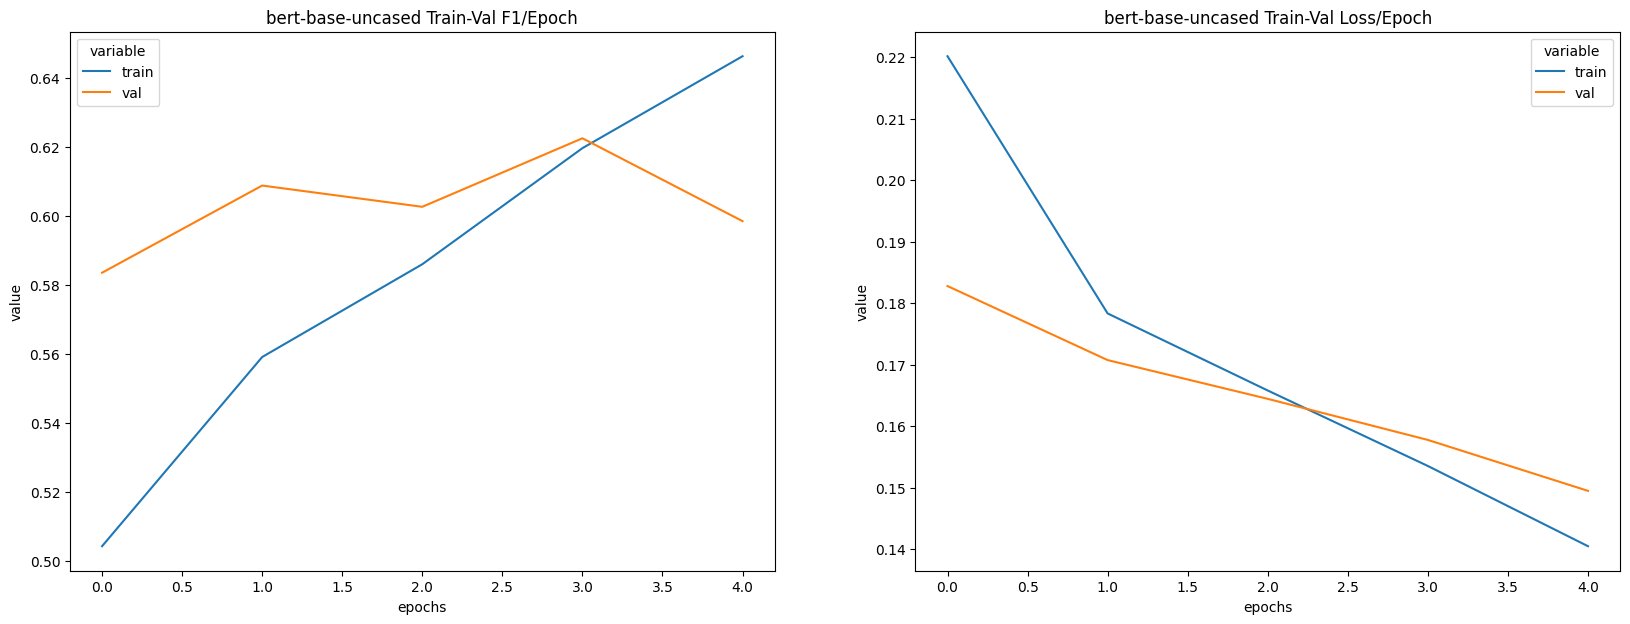

/home/preethamthava/LegalEval2022/rhetorical_roles//distilbert/results


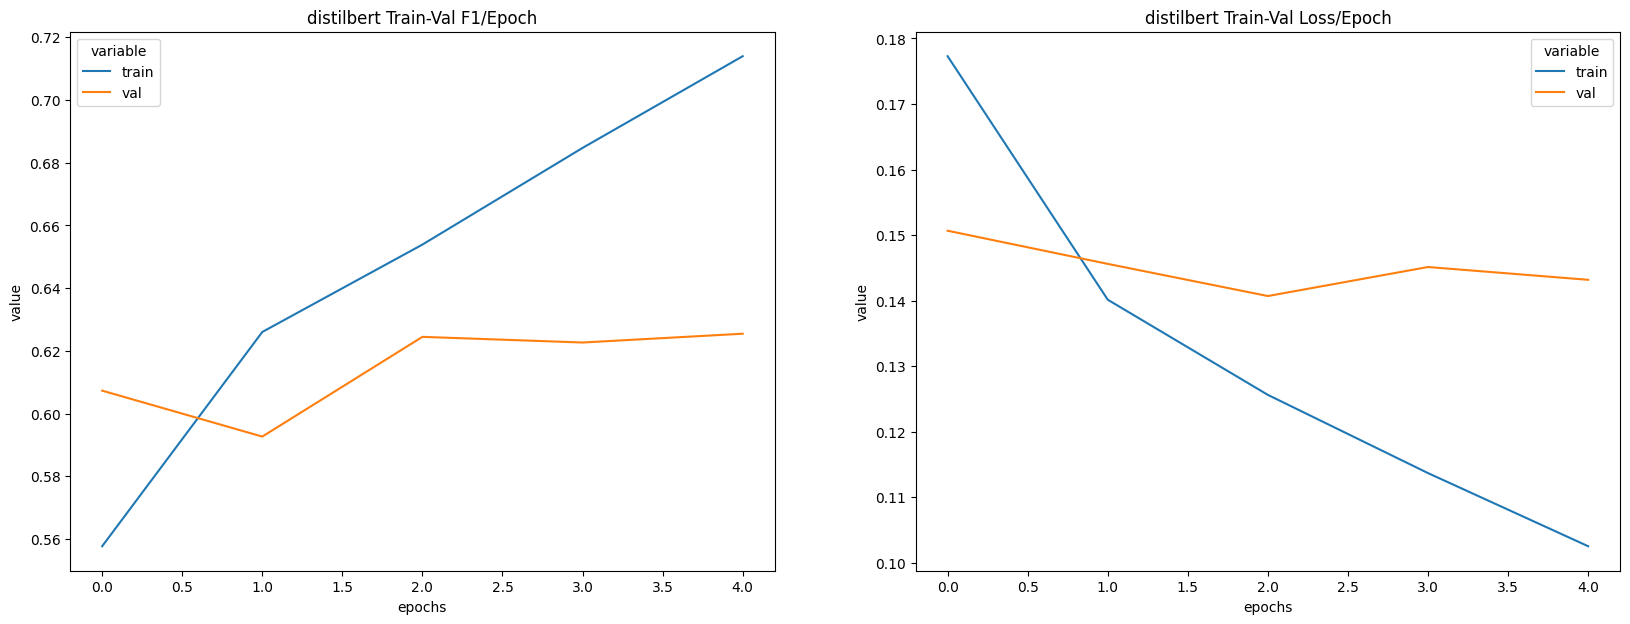

/home/preethamthava/LegalEval2022/rhetorical_roles//deberta_tok_seq/results


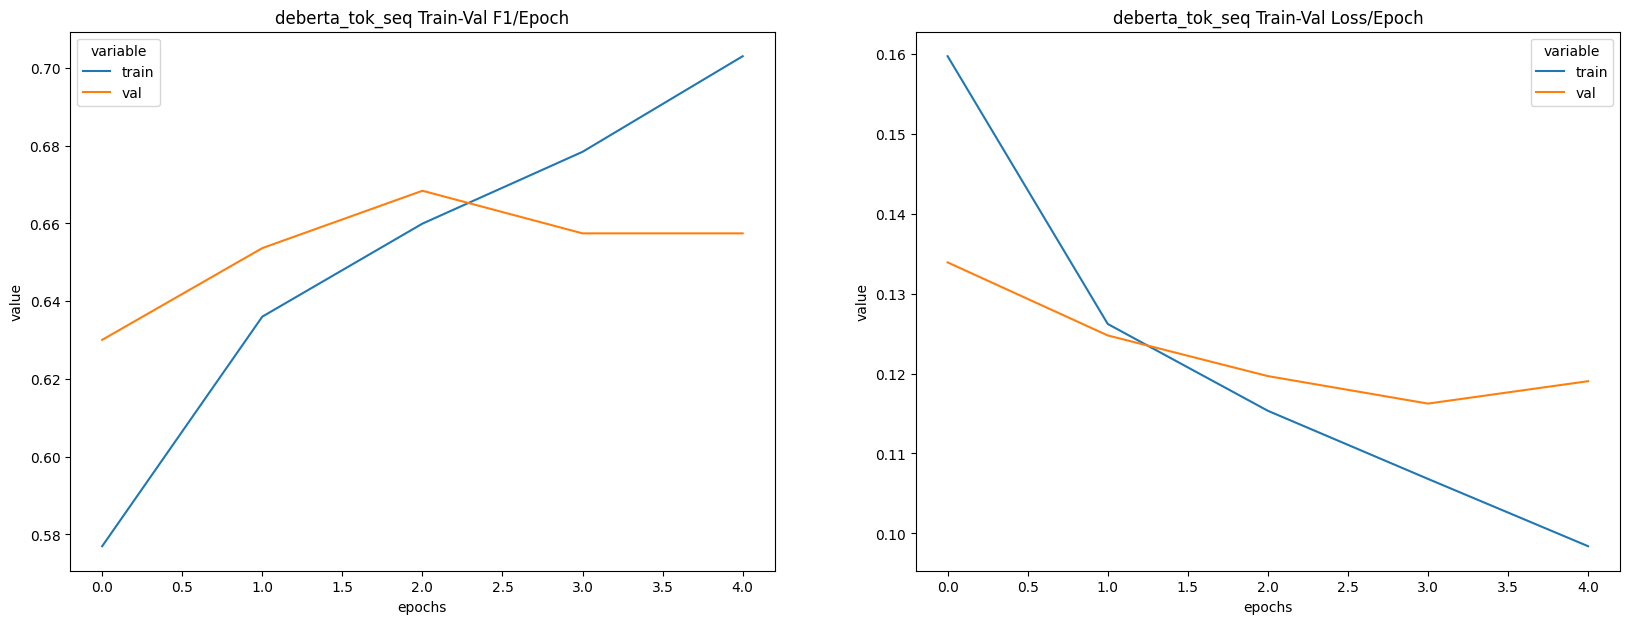

In [17]:
root = '/home/preethamthava/LegalEval2022/rhetorical_roles/models'
os.chdir(root)
model_dirs = os.listdir()
print(model_dirs)

for m in model_dirs:
    path = f'{root}/{m}/results'
    if os.path.isdir(path):
        print(path)
        os.chdir(path)
        results = os.listdir()
        if len(results) !=0:
            f1_res, loss_res = results[0], results[1]

            with open(f1_res, 'rb') as f:
                f1_met = pickle.load(f)

            with open(loss_res, 'rb') as f:
                loss_met = pickle.load(f)
            plot_met_curves(f1_met, loss_met, m)